In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/main/dataset/Data%20Science%20for%20Good-%20PASSNYC/2016%20School%20Explorer.csv")
df.head()

,Adjusted Grade,New?,Other Location Code in LCGMS,School Name,SED Code,Location Code,District,Latitude,Longitude,Address (Full),...,Grade 8 Math - All Students Tested,Grade 8 Math 4s - All Students,Grade 8 Math 4s - American Indian or Alaska Native,Grade 8 Math 4s - Black or African American,Grade 8 Math 4s - Hispanic or Latino,Grade 8 Math 4s - Asian or Pacific Islander,Grade 8 Math 4s - White,Grade 8 Math 4s - Multiracial,Grade 8 Math 4s - Limited English Proficient,Grade 8 Math 4s - Economically Disadvantaged
0,NaN,NaN,NaN,P.S. 015 ROBERTO CLEMENTE,310100010015,01M015,1,40.721834,-73.978766,"333 E 4TH ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,NaN,P.S. 019 ASHER LEVY,310100010019,01M019,1,40.729892,-73.984231,"185 1ST AVE NEW YORK, NY 10003",...,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,NaN,P.S. 020 ANNA SILVER,310100010020,01M020,1,40.721274,-73.986315,"166 ESSEX ST NEW YORK, NY 10002",...,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,NaN,P.S. 034 FRANKLIN D. ROOSEVELT,310100010034,01M034,1,40.726147,-73.975043,"730 E 12TH ST NEW YORK, NY 10009",...,48,1,0,0,0,0,0,0,0,0
4,NaN,NaN,NaN,THE STAR ACADEMY - P.S.63,310100010063,01M063,1,40.724404,-73.986360,"121 E 3RD ST NEW YORK, NY 10009",...,0,0,0,0,0,0,0,0,0,0


In [4]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
df2 = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
df2

,Total,Percent
Other Location Code in LCGMS,1271,0.999214
Adjusted Grade,1270,0.998428
New?,1245,0.978774
School Income Estimate,396,0.311321
Student Achievement Rating,86,0.067610
...,...,...
Grade 3 Math 4s - Economically Disadvantaged,0,0.000000
Grade 3 Math 4s - Limited English Proficient,0,0.000000
Grade 3 Math 4s - Multiracial,0,0.000000
Grade 3 Math 4s - White,0,0.000000


In [5]:
duplicate_bool=df.duplicated()
duplicate=df.loc[duplicate_bool == True]
print(duplicate)

Empty DataFrame
Columns: [Adjusted Grade, New?, Other Location Code in LCGMS, School Name, SED Code, Location Code, District, Latitude, Longitude, Address (Full), City, Zip, Grades, Grade Low, Grade High, Community School?, Economic Need Index, School Income Estimate, Percent ELL, Percent Asian, Percent Black, Percent Hispanic, Percent Black / Hispanic, Percent White, Student Attendance Rate, Percent of Students Chronically Absent, Rigorous Instruction %, Rigorous Instruction Rating, Collaborative Teachers %, Collaborative Teachers Rating, Supportive Environment %, Supportive Environment Rating, Effective School Leadership %, Effective School Leadership Rating, Strong Family-Community Ties %, Strong Family-Community Ties Rating, Trust %, Trust Rating, Student Achievement Rating, Average ELA Proficiency, Average Math Proficiency, Grade 3 ELA - All Students Tested, Grade 3 ELA 4s - All Students, Grade 3 ELA 4s - American Indian or Alaska Native, Grade 3 ELA 4s - Black or African American

         City  Economic Need Index
202     BRONX                0.957
752  BROOKLYN                0.948
764  BROOKLYN                0.944
642  BROOKLYN                0.943
264     BRONX                0.939
..        ...                  ...
491  BROOKLYN                0.782
461  BROOKLYN                0.782
248     BRONX                0.781
538  BROOKLYN                0.781
470  BROOKLYN                0.780

[500 rows x 2 columns]


<AxesSubplot:xlabel='Economic Need Index', ylabel='City'>

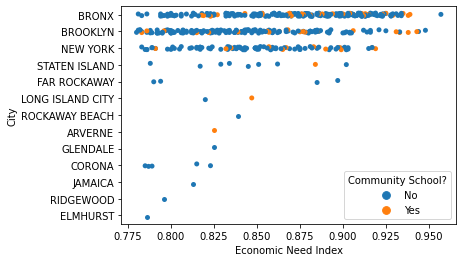

In [6]:
df1=df.sort_values(by=['Economic Need Index'],ascending=False)
df1=df1.iloc[:500,]
print(df1[['City','Economic Need Index']])
sns.stripplot(x="Economic Need Index", y="City",hue="Community School?",data=df1)

<AxesSubplot:xlabel='count', ylabel='Student Attendance Rate'>

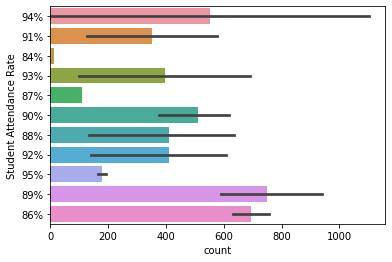

In [7]:
subset=df.loc[(df.City.isin(['NEW YORK','BROOKLYN'])& (df['Community School?']=="Yes"),['Student Attendance Rate'])]
subset
subset['count']=subset.index
sns.barplot(x="count",y="Student Attendance Rate",data=subset)

Supportive Environment %       False   True
Collaborative Teachers Rating              
Approaching Target               2.0  185.0
Exceeding Target                 2.0  421.0
Meeting Target                   1.0  574.0
Not Meeting Target               NaN   11.0


<AxesSubplot:xlabel='Greaterthan70', ylabel='Collaborative Teachers Rating'>

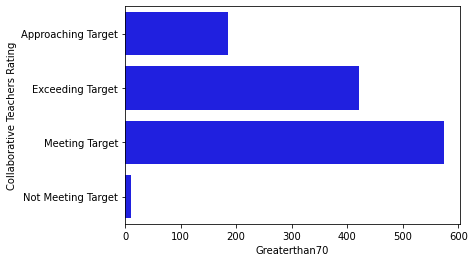

In [8]:
df.reset_index(inplace=True)
a=df.pivot_table(values = 'index', index =['Collaborative Teachers Rating'],columns=df['Supportive Environment %']>"70%", aggfunc = 'count')
print(a)
a.columns=['Lessthan70','Greaterthan70']
a['Collaborative Teachers Rating']=a.index
sns.barplot(x="Greaterthan70", y="Collaborative Teachers Rating",data=a,color="blue") 

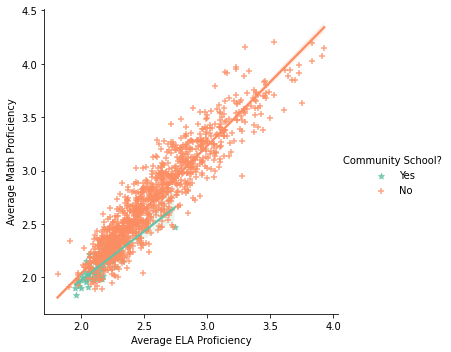

In [9]:
sns.lmplot(x="Average ELA Proficiency", y="Average Math Proficiency", hue="Community School?", markers=["*","+"], palette="Set2", data=df)

<Figure size 432x288 with 0 Axes>

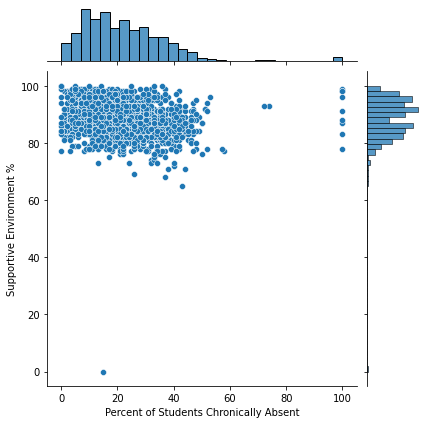

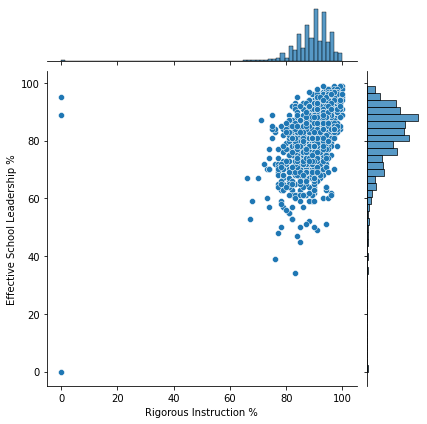

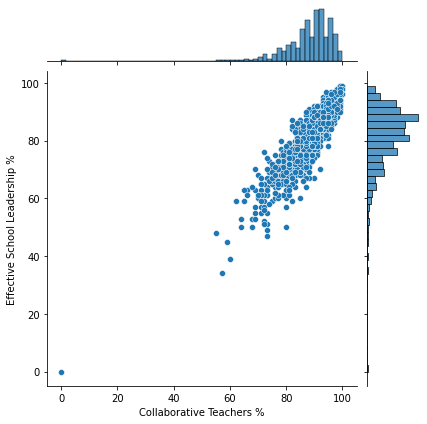

In [10]:
col1=['Rigorous Instruction %']
df[col1]=df[col1].replace({'\%':' '},regex=True)
df[col1]=df[col1].astype('float64')
col2=['Effective School Leadership %']
df[col2]=df[col2].replace({'\%':' '},regex=True)
df[col2]=df[col2].astype('float64')
col3=['Collaborative Teachers %']
df[col3]=df[col3].replace({'\%':' '},regex=True)
df[col3]=df[col3].astype('float64')
col4=['Percent of Students Chronically Absent']
df[col4]=df[col4].replace({'\%':' '},regex=True)
df[col4]=df[col4].astype('float64')
col5=['Supportive Environment %']
df[col5]=df[col5].replace({'\%':' '},regex=True)
df[col5]=df[col5].astype('float64')
a=df[col1]
b=df[col2]
c=df[col3]
d=df[col4]
e=df[col5]
result=pd.concat([a, b,c,d,e], axis=1)
plt.figure(1)
sns.jointplot(x="Percent of Students Chronically Absent", y="Supportive Environment %",data=result)
plt.figure(2)
sns.jointplot(y="Effective School Leadership %", x="Rigorous Instruction %",data=result)
plt.figure(3)
sns.jointplot(y="Effective School Leadership %", x="Collaborative Teachers %",data=result)

In [11]:
df[df['Percent Black / Hispanic'] >= '70%'][['Average ELA Proficiency','Average Math Proficiency']].mean()

Average ELA Proficiency     2.357277
Average Math Proficiency    2.446412
dtype: float64

In [12]:
df[df['Percent Black / Hispanic'] <= '30%'][['Average ELA Proficiency','Average Math Proficiency']].mean()

Average ELA Proficiency     3.021429
Average Math Proficiency    3.289657
dtype: float64

Text(0, 0.5, 'Frequency Count')

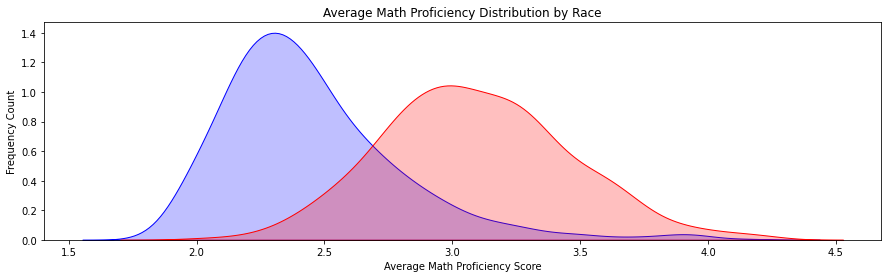

In [13]:
df['Black_Hispanic_Dominant'] = df['Percent Black / Hispanic'] >='70%'

fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Black_Hispanic_Dominant'] == True),'Average Math Proficiency'] , color='b',shade=True, label='Black/Hispanic Dominant School')
ax=sns.kdeplot(df.loc[(df['Black_Hispanic_Dominant'] == False),'Average Math Proficiency'] , color='r',shade=True, label='Asian/White Dominant School')
plt.title('Average Math Proficiency Distribution by Race')
plt.xlabel('Average Math Proficiency Score')
plt.ylabel('Frequency Count')

Text(0, 0.5, 'Frequency Count')

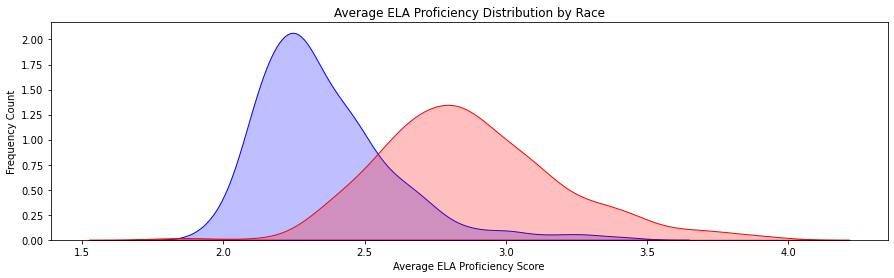

In [14]:
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['Black_Hispanic_Dominant'] == True),'Average ELA Proficiency'] , color='b',shade=True, label='Black/Hispanic Dominant School')
ax=sns.kdeplot(df.loc[(df['Black_Hispanic_Dominant'] == False),'Average ELA Proficiency'] , color='r',shade=True, label='Asian/White Dominant School')
plt.title('Average ELA Proficiency Distribution by Race')
plt.xlabel('Average ELA Proficiency Score')
plt.ylabel('Frequency Count')
